In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func



In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [11]:
# Get a list of column names and types
# columns
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])


id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [12]:
# Get a list of column names and types
# columns
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])


id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [13]:
lastDate = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
lastDate


('2017-08-23')

In [81]:
query_date = dt.date(2017,8,23)-dt.timedelta(days=365)
query_date

datetime.date(2016, 8, 23)

In [82]:
stmt = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= query_date).\
    order_by(Measurement.date.desc()).statement

df4=pd.read_sql_query(stmt, session.bind)
df4.tail(10)




,date,prcp
2220,2016-08-24,1.22
2221,2016-08-24,2.15
2222,2016-08-24,1.45
2223,2016-08-23,0.00
2224,2016-08-23,0.15
2225,2016-08-23,0.05
2226,2016-08-23,NaN
2227,2016-08-23,0.02
2228,2016-08-23,1.79
2229,2016-08-23,0.70


In [59]:
mean_prcp = df4.mean()
mean_prcp
std_prcp = df4.std()
std_prcp
max_prcp = df4.max()
max_prcp
count_rows = df4.count()
count_rows


date    2021
prcp    2021
dtype: int64

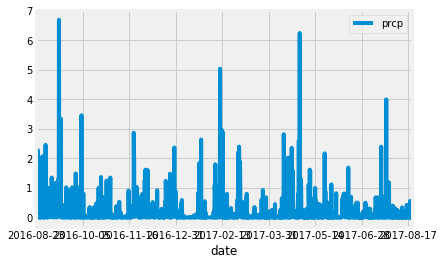

In [16]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the datadf = pd.DataFrame(yearPrcp, columns=['date', 'prcp'])
df4.set_index('date', inplace=True)
df4.sort_index(inplace=True)
# df4.plot(figsize=(20,20))
df4.plot()
# plt.title('Precipitation in Hawaii', fontsize=16)
# plt.legend()
# plt.tight_layout()
# plt.savefig('precipitation_bar.png')
# plt.show()



![precipitation](Images/precipitation.png)

In [17]:
stmt = session.query(Measurement).\
    order_by(Measurement.date.desc()).statement
df3=pd.read_sql_query(stmt, session.bind)
df3.head(10)


,id,station,date,prcp,tobs
0,2724,USC00519397,2017-08-23,0.00,81.0
1,7635,USC00514830,2017-08-23,0.00,82.0
2,12187,USC00519523,2017-08-23,0.08,82.0
3,19550,USC00516128,2017-08-23,0.45,76.0
4,2723,USC00519397,2017-08-22,0.00,82.0
5,12186,USC00519523,2017-08-22,0.00,82.0
6,19549,USC00516128,2017-08-22,0.50,76.0
7,2722,USC00519397,2017-08-21,0.00,81.0
8,7634,USC00514830,2017-08-21,0.02,79.0
9,12185,USC00519523,2017-08-21,NaN,82.0


In [18]:
df4.tail()

,prcp
date,
2017-08-22,0.00
2017-08-23,0.45
2017-08-23,0.08
2017-08-23,0.00
2017-08-23,0.00


In [84]:
perc = [.25, .5, .75]
include = ['object', 'float']
desc = df4.describe( percentiles = perc, include = include)
desc


,date,prcp
count,2230,2021.000000
unique,366,NaN
top,2017-02-09,NaN
freq,7,NaN
mean,NaN,0.177279
std,NaN,0.461190
min,NaN,0.000000
25%,NaN,0.000000
50%,NaN,0.020000
75%,NaN,0.130000


In [20]:
# Use Pandas to calculate the summary statistics for the precipitation data



![describe](Images/describe.png)

In [21]:
# num_stations = engine.execute('SELECT count(id) FROM Station').fetchall()
# num_stations

[(9,)]

In [22]:
num_stations = session.query(Station).count()
print(num_stations)

9


In [23]:
# Design a query to show how many stations are available in this dataset?
results = session.query(Station.station, Station.id, Station.name).\
    order_by(Station.id)
                     
station_name = [result[2] for result in results[:9]]
station_id = [int(result[1]) for result in results[:9]]
station_stn = [result[0] for result in results[:9]]


In [72]:
sel = [Measurement.station, func.count(Measurement.id)]
station_results = session.query(*sel).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
station_results

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [87]:
sel2 = [Measurement.station]
most_measured = session.query(*sel2).\
    group_by((Measurement.station)).\
    order_by(func.count(Measurement.station).desc()).first()
most_measured


('USC00519281')

In [122]:

min_results = session.query(func.min(Measurement.tobs)).\
    filter(Measurement.station=='USC00519281')
min_tobs = min_results.one()
max_results = session.query(func.max(Measurement.tobs)).\
    filter(Measurement.station=='USC00519281')
max_tobs = max_results.one()
ave_results = session.query(func.avg(Measurement.tobs)).\
    filter(Measurement.station=='USC00519281')
ave_tobs = ave_results.one()

temp_stats =[min_tobs, max_tobs, ave_tobs]

print(temp_stats)

[(54.0,), (85.0,), (71.66378066378067,)]


In [25]:
df6 = pd.DataFrame(results[:9], columns = ['station_stn', 'station_id', 'station_name'])
# df6.set_index('station_id', inplace =True,)
# df6


stmt = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= '2016-08-23').\
    order_by(Measurement.date.desc()).statement

df4=pd.read_sql_query(stmt, session.bind)
df4.tail(10)

In [ ]:
data = SQL.session.query(Measurements, \
                                  label('low', func.min(HeatModel.low)),
                                  label('high', func.max(HeatModel.high)),
                                  label('total', func.sum(HeatModel.average)),
                                  label('date', HeatModel.date)).\
            join(iCPEModel).\
            filter(iCPEModel.mac_address == icpe).\
            order_by(HeatModel.date.desc()).\
            group_by(HeatModel.date).first()

In [66]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
max_stations = session.query(func.max(Measurement.prcp))
print(max_stations)

SELECT max(measurement.prcp) AS max_1 
FROM measurement


In [ ]:
mean_prcp = df4.mean()
mean_prcp
std_prcp = df4.std()
std_prcp

count_rows = df4.count()
count_rows

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BE3281C188>]],
      dtype=object)

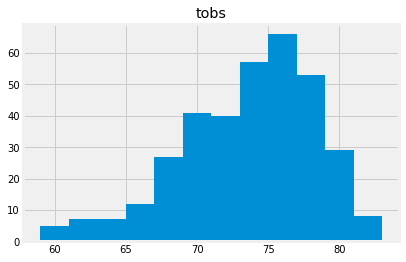

In [142]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

stmt2 = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.date >= query_date, Measurement.station=='USC00519281').\
    order_by(Measurement.date.asc()).statement

df7=pd.read_sql_query(stmt2, session.bind)

df7.tail(10)

df7.hist(column='tobs', bins=12)


# plot.hist(x,bins=12)
# plot.axis()


In [28]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


![precipitation](Images/station-histogram.png)

In [145]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [152]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
temps = calc_temps('2016-08-24', '2017-08-24')
print(temps)

[(58.0, 74.57894736842105, 87.0)]


In [159]:
# Use Pandas Plotting with Matplotlib to plot the datadf = pd.DataFrame(yearPrcp, columns=['date', 'prcp'])
#df7.set_index('date', inplace=True)
#df7.sort_index(inplace=True)
# df4.plot(figsize=(20,20))
ave_temp = temps
ave_temp
#df7.plot.bar(y=)
#plt.title('Trip Ave Temp', fontsize=16)
# plt.legend()
# plt.tight_layout()
# plt.savefig('precipitation_bar.png')
# plt.show()

IndexError: list index out of range

In [31]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [32]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [33]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [34]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [35]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [36]:
# Plot the daily normals as an area plot with `stacked=False`
